Source: [Algorithms Illuminated Part-1 By Tim Roughgarden](https://www.amazon.com/Algorithms-Illuminated-Part-1-Basics/dp/0999282905)\
Before implementing Karatsuba multiplication. We explore a simple recursive algorithm to integer multiplication 

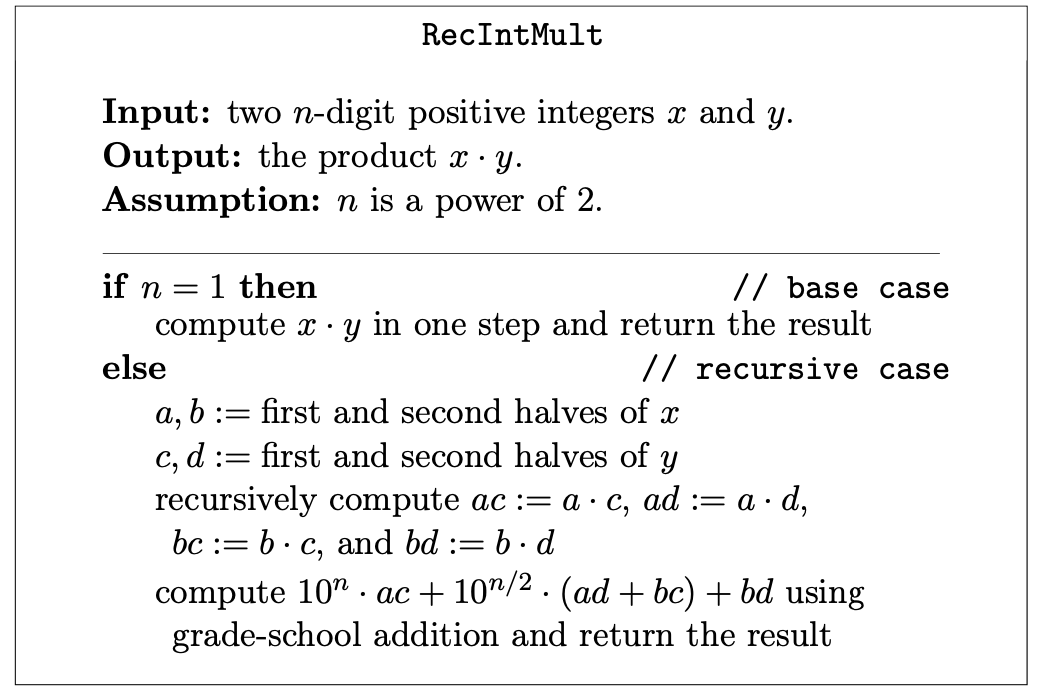

In [1]:
# Python Implementation of the above mentioned algorithm
# The only assumption for this algorithm and implementation is n is even.
import math
def RecIntMult(x,y):

  #base case 
  n = math.floor(math.log10(x) + 1)
  if n == 1: 
    return x*y
  else:
    a = x//(10**(n/2))
    b = x%(10**(n/2))
    c = y //(10**(n/2))
    d = y%(10**(n/2))
    #print("a",a,"b",b,"c",c,"d",d)

    return 10**n * RecIntMult(a,c) + 10**(n/2)*(RecIntMult(a,d) + RecIntMult(b,c)) + RecIntMult(b,d)
  

In [2]:
x = 5678
y = 1234

result = RecIntMult(x,y)

print("The result of multiplication : 5678 * 1234 : ",result)


The result of multiplication : 5678 * 1234 :  7006652.0


# <font color='blue'>Karatsuba Multiplication</font>

Karatsuba multiplication is an optimized version of the `RecIntMult`.

The `RecIntMult` algorithm uses four recursive calls, one for each of the product. But we don't care much about $a.d \text{ or } b.c$, except inasmuch as we care about their sum $a.d + b.c$.

We can use only three recursive calls. :      
`Step 1` : Recursively compute $a.c$\
`Step 2` : Recursively compute $b.d$

Instead of recursively computing $a.d$ or $b.c$, we recursively compute the product $(a+b).(c+d)$

`Step 3` : Compute $a+b$ and $c+d$ and recursively compute $(a+b).(c+d)$

Subtracting the result of step 1 and step 2 from step 3, exactly gives us $ad+bc$.

`Step 4` : Subtract the results of the first two steps from the result of the third step. to obtain $a.d + b.c$.

`Step 5` : To compute $ x.y = 10^n *(a.c) + 10^{n/2} * (ad + bc) + bd $, add the result of `step 1, 2 and 4`,  after adding $10^n$ trailing zeros in `step 1` and $10^{n/2}$ trailing zeros in `step 2` to the answer in `step 4`. 

The Karatsuba multiplication only takes three recursive calls.


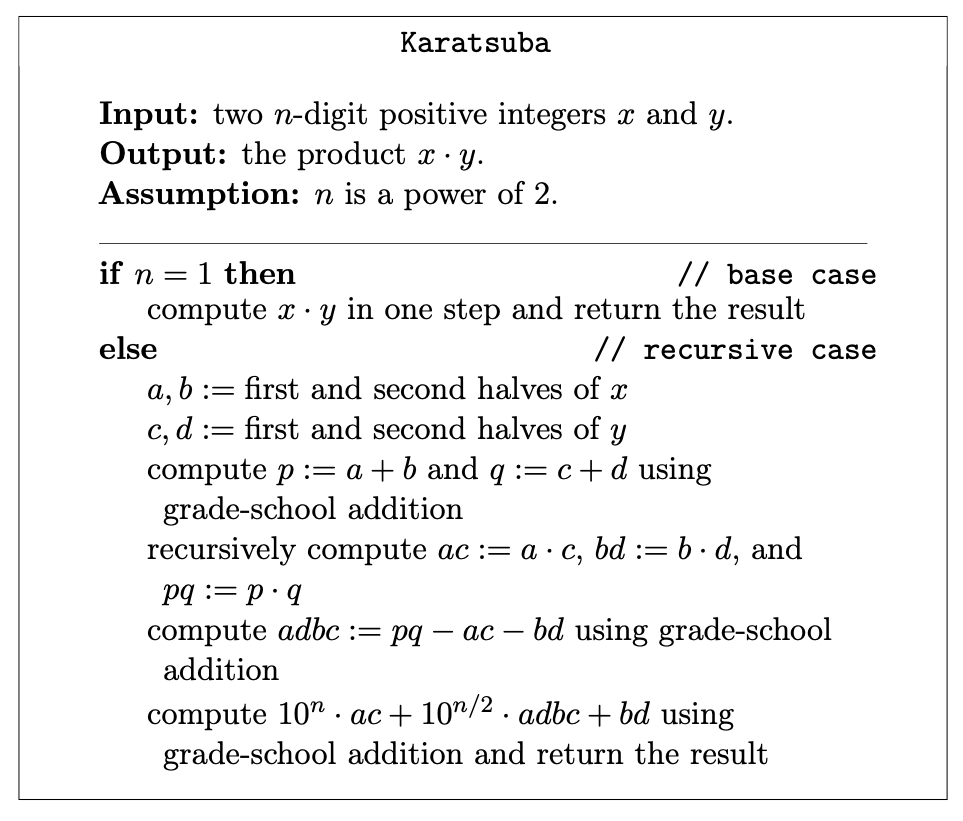

In [14]:
# Python Implementation of the karatsuba  multiplication 
# The only assumption for this algorithm and implementation is n is even.
import math
def karatsuba_mul(x,y):

  #base case 
  n = math.floor(math.log10(x) + 1)
  #print("n",n)
  if n == 1: 
    return x*y
  else:
    a = x//(10**(n/2))
    b = x%(10**(n/2))
    c = y //(10**(n/2))
    d = y%(10**(n/2))
    print("a",a,"b",b,"c",c,"d",d)

    ac = karatsuba_mul(a,c) 
    bd = karatsuba_mul(b,d)
    pq = karatsuba_mul(a+b,c+d)
    adbc = pq - ac - bd

    return 10**n * ac + 10**(n/2)* adbc + bd
  

In [15]:
x = 5678
y = 1234
result = karatsuba_mul(x,y)

print("The result of multiplication : 5678 * 1234 : ",result)

a 56.0 b 78.0 c 12.0 d 34.0
a 5.0 b 6.0 c 1.0 d 2.0
a 1.0 b 1.0 c 0.0 d 3.0
a 7.0 b 8.0 c 3.0 d 4.0
a 1.0 b 5.0 c 0.0 d 7.0
a 4.0 b 7.50889359326483 c 1.0 d 14.377223398316207
a 1.0 b 1.5088935932648297 c 1.0 d 5.377223398316207
The result of multiplication : 5678 * 1234 :  7006652.0
